In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

data = pd.read_csv("score.csv") # 공부 시간에 비례한 시험점수 데이터셋.

# 모든 데이터셋이 실수라서 실수화 패스 LabelEncoder()
print(data.head())  # 5개 보기
print(data.describe())  # 전반적인 데이터 설명
print(np.shape(data))   # 데이터 차원 확인 행은 25개, 2차원 
print(data.isnull().sum())  # 결측값 확인 하고 더하기


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
(25, 2)
Hours     0
Scores    0
dtype: int64


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packa

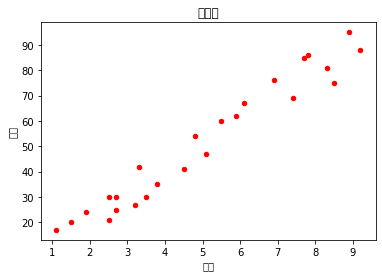

In [2]:
import matplotlib.pyplot as plt


data.plot(kind = "scatter", x= "Hours", y = "Scores", color = 'Red' , s = 20)


plt.title("그래프")
plt.xlabel("시간")
plt.ylabel("성적")
plt.show()

In [3]:

# train_test = data.drop("Hours", axis=1)
# score_test = data.drop("Scores", axis=1)
hours = data.drop('Scores', axis = 1, inplace=False)
scores = data.drop('Hours', axis = 1, inplace=False)

print(hours.head())
print(scores.head())

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
   Scores
0      21
1      47
2      27
3      75
4      30


In [4]:
#train test slit
X_train,X_test, y_train,y_test = train_test_split(hours, scores, test_size=0.3, random_state=50)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

    Hours
3     8.5
19    7.4
7     5.5
10    7.7
2     3.2
    Hours
15    8.9
20    2.7
23    6.9
22    3.8
14    1.1
    Scores
3       75
19      69
7       60
10      85
2       27
    Scores
15      95
20      30
23      76
22      35
14      17


In [5]:
# 단순선형회귀 OLS method

from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train) #학습데이터를 통하여 선형모델 생성

print('Coefficients(계수): ', Linear_model.coef_)
print('Intercept(절편): ', Linear_model.intercept_)

Coefficients(계수):  [[9.52160608]]
Intercept(절편):  [3.78430794]


In [6]:
train_predictions=Linear_model.predict(X_train)
print(train_predictions)



[[84.71795959]
 [74.24419291]
 [56.15314136]
 [77.10067473]
 [34.25344739]
 [21.87535949]
 [49.48801711]
 [78.05283534]
 [61.86610501]
 [18.06671706]
 [91.38308384]
 [37.10992921]
 [52.34449893]
 [35.20560799]
 [59.96178379]
 [27.58832313]
 [27.58832313]]


In [9]:
#성능평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test,train_predictions))
print('MSE:', mean_squared_error(y_test,train_predictions)) 
print('RMSE:', mean_squared_error(y_test,train_predictions,squared=False))
print('R_Squared:', r2_score(y_test,train_predictions))


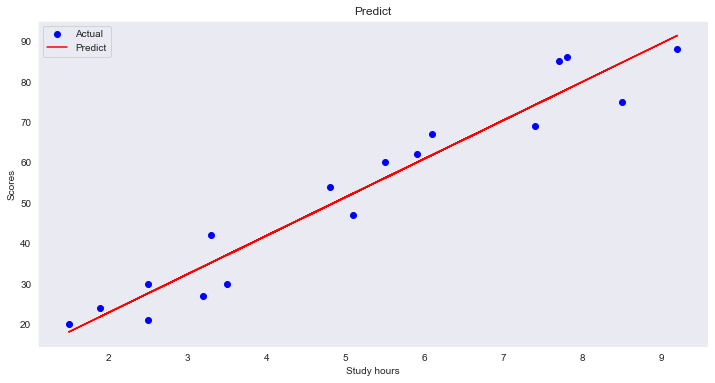

In [ ]:
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, train_predictions , color='red')
plt.xlabel("Study hours")
plt.ylabel("Scores")
plt.title("Predict")
plt.legend(['Actual','Predict']);

In [ ]:
# 시각화
plt.plot(X_train, train_predictions, 'r-o');
plt.xlabel('Hours');
plt.ylabel('Predicted Scores');

In [ ]:
from sklearn.metrics import accuracy_score #정확도 계산을 위한 모듈 import
from sklearn.metrics import confusion_matrix # 혼합 행렬을 통한 정확도 계싼

In [ ]:
### 학습 데이터 및 테스트 데이터로 분류 ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


### 단순 선형회귀 OLS method ###
from sklearn.linear_model import LinearRegression       # 선형회귀를 위한 import        선형회귀 OLS:Ordinary Least Square

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train) #학습데이터를 통하여 선형모델 생성

# print('Coefficients(계수): ', ols_reg.coef_)
# print('Intercept(절편): ', ols_reg.intercept_)

ols_df = pd.DataFrame(ols_reg.coef_, columns=feature_names) # columns 독립 변수 이름
print(ols_df.T)

y_pred_ols = ols_reg.predict(X_test) #테스트데이터로 예측수행 
print(y_pred_ols[:5])

X_test[:5].dot(ols_reg.coef_.T) + ols_reg.intercept_ 


#성능평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', round(mean_absolute_error(y_test,y_pred_ols),3))
print('MSE:', round(mean_squared_error(y_test,y_pred_ols),3)) 
print('RMSE:', round(mean_squared_error(y_test,y_pred_ols,squared=False),3))
print('R_Squared:', round(r2_score(y_test,y_pred_ols),3))


NameError: name 'X' is not defined

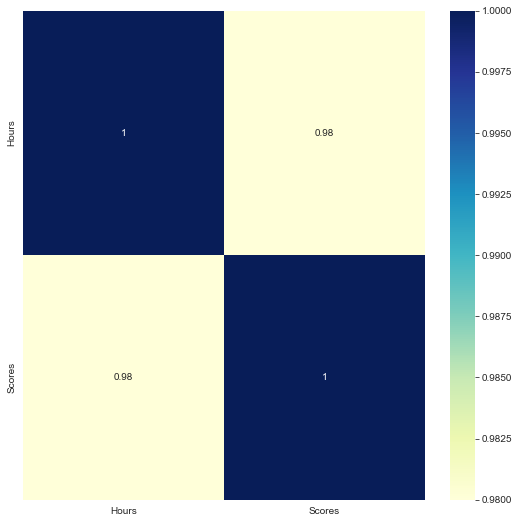

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

raw_df = pd.read_csv("score.csv")
raw_df      # 데이터 전처리가 안된 값


# #hstack 수평으로 값을 stack
# X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #독립변수 13개  law 데이터가 다음행 1열까지 위치 하고 있으므로 제대로 값을 보기위해 열을 13개로 만듦.    # 독립변수는 스스로가 정하고 여기서의 독립변수는 상황(국가가 다름)등에 따라서 다름.
# y = raw_df.values[1::2, 2] #종속변수: 본인 소유 주택가격(중앙값)
# y = y.reshape(-1,1)


import seaborn as sns # 시각화 라이브러리   #변수간의 상관관계를 살펴보기 용이함.


#correlation_matrix 판다스에서 기본 제공함.
correlation_matrix = raw_df.corr().round(2)
plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()


In [ ]:
### 학습 데이터 및 테스트 데이터로 분류 ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_df, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


NameError: name 'y' is not defined